In [35]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [36]:
pwd

'C:\\Users\\18644\\Desktop\\THINKFUL\\Data Science Bootcamp\\UNIT 2\\Lesson 2'

In [37]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [38]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                          351 non-null object
Population                    348 non-null object
Violent
crime                 348 non-null object
Murder                        348 non-null float64
Rape
(revised
definition)1    0 non-null float64
Rape
(legacy
definition)2     348 non-null object
Robbery                       348 non-null object
Aggravated
assault            348 non-null object
Property crime                348 non-null object
Burglary                      348 non-null object
Larceny-
theft                348 non-null object
Motor
vehicle
theft           348 non-null object
Arson3                        187 non-null float64
dtypes: float64(3), object(10)
memory usage: 35.7+ KB


In [40]:
df.dtypes

City                             object
Population                       object
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                          object
Aggravated\nassault              object
Property crime                   object
Burglary                         object
Larceny-\ntheft                  object
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

Converting Population, Murder, Robbery and Property crime to the rewquired datatypes

In [41]:
df['Population']= df['Population'].apply(lambda x: str(x).replace(',', ''))
df['Population']= df['Population'].apply(lambda x: float(x))


In [42]:
df['Murder']= df['Murder'].apply(lambda x: str(x).replace(',', ''))
df['Murder']= df['Murder'].apply(lambda x: float(x))

In [43]:
df['Robbery']= df['Robbery'].apply(lambda x: str(x).replace(',', ''))
df['Robbery'] = df['Robbery'].apply(lambda x: float(x))

In [44]:
df['Property crime']= df['Property crime'].apply(lambda x: str(x).replace(',', ''))
df['Property crime'] = df['Property crime'].apply(lambda x : float(x))

In [45]:
df.dtypes

City                             object
Population                      float64
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                         float64
Aggravated\nassault              object
Property crime                  float64
Burglary                         object
Larceny-\ntheft                  object
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [46]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan


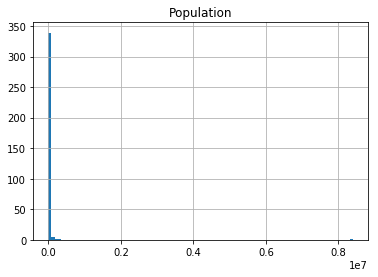

Median  7233.5
Std  450037.3675209857
Outliers above  907308.2350419714


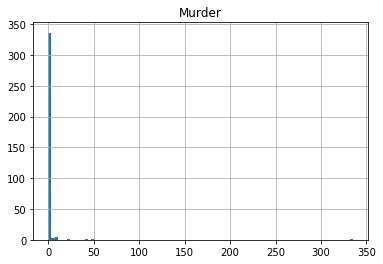

Median 0.0
Std 18.303672792887784
Outliers above 36.60734558577557


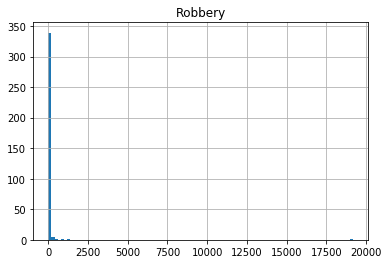

Median 1.0
Std 1031.032873295524
Outliers above 2063.065746591048


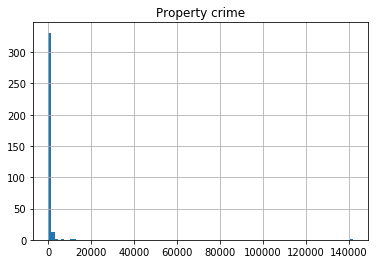

Median 112.5
Std 7659.724745633146
Outliers above 15431.949491266292


In [47]:
#Distributions of variables
# Population
df['Population'].hist(bins=100)
plt.title('Population')
plt.show()

#Median, standard deviation and the limit for outliers
median = df.Population.median()
std = df.Population.std()
pop_outlier = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_outlier)

#Murder
df['Murder'].hist(bins=100)
plt.title('Murder')
plt.show()

#Median, standard deviation and the limit of outliers
median = df.Murder.median()
std = df.Murder.std()
mur_outlier = median + 2* std

print('Median', median)
print('Std', std)
print('Outliers above', mur_outlier)



#For Robbery
df['Robbery'].hist(bins=100)
plt.title('Robbery')
plt.show()

#Median, standard deviation and outliers above
median = df.Robbery.median()
std = df.Robbery.std()
rob_outlier = median + 2* std

print('Median', median)
print('Std', std)
print('Outliers above', rob_outlier)


#Property crime
df['Property crime'].hist(bins = 100)
plt.title('Property crime')
plt.show()

#Median, standard deviation and outliers above

median= df['Property crime'].median()
std = df['Property crime'].std()
property_outlier = median + 2*std

print('Median', median)
print('Std', std)
print('Outliers above', property_outlier)

In [48]:
#Removing the outliers:
df['Population']= df.Population.map(lambda x: x if x < pop_outlier else None)
df['Murder']= df.Murder.map(lambda x: x if x < mur_outlier else None)
df['Robbery'] = df.Robbery.map(lambda x: x if x < rob_outlier else None)
df['Property crime']= df['Property crime'].map(lambda x: x if x < property_outlier else None)

In [49]:
#Droping the missing values and observing the extreme values
print(df.Population.dropna().sort_values(ascending = False).head())
print(df.Murder.dropna().sort_values(ascending = False).head())
print(df.Robbery.dropna().sort_values(ascending = False).head())
print(df['Property crime'].dropna().sort_values(ascending = False).head())

35    258789.000
272   210562.000
346   199134.000
310   143834.000
7     118296.000
Name: Population, dtype: float64
310   21.000
140   10.000
3      8.000
285    8.000
321    7.000
Name: Murder, dtype: float64
35    1322.000
272    918.000
310    400.000
346    390.000
206    228.000
Name: Robbery, dtype: float64
35    12491.000
272   10051.000
310    6473.000
3      4090.000
218    2807.000
Name: Property crime, dtype: float64


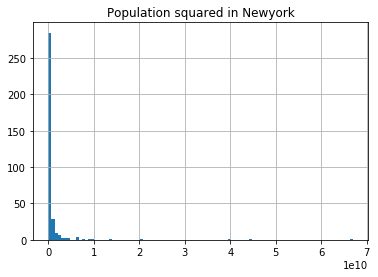

In [50]:
#Population squared feature
df['Popsquared']= df['Population']** 2
df['Popsquared'].hist(bins = 100)
plt.title ('Population squared in Newyork')
plt.show()

In [51]:
#Converting Murder and Robbery to categorical responsed
df['Murder_category']=df.Murder.apply(lambda x: 1 if x > 0 else 0) 
df['Robbery_category']= df.Robbery.apply(lambda x: 1 if x > 0 else 0) 

In [52]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Popsquared,Murder_category,Robbery_category
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,3463321.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,6640929.000,0,0
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,8099716.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,9595377936.000,1,1
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,40806544.000,0,1


In [53]:
features = df[['Population', 'Popsquared', 'Murder_category', 'Robbery_category', 'Property crime']].dropna()

In [54]:
features.head(10)

,Population,Popsquared,Murder_category,Robbery_category,Property crime
0,1861.000,3463321.000,0,0,12.000
1,2577.000,6640929.000,0,0,24.000
2,2846.000,8099716.000,0,0,16.000
3,97956.000,9595377936.000,1,1,4090.000
4,6388.000,40806544.000,0,1,223.000
5,4089.000,16719921.000,0,1,46.000
6,1781.000,3171961.000,0,0,10.000
7,118296.000,13993943616.000,1,1,2118.000
8,9519.000,90611361.000,0,1,210.000
9,18182.000,330585124.000,0,1,405.000


In [55]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 5 columns):
Population          347 non-null float64
Popsquared          347 non-null float64
Murder_category     347 non-null int64
Robbery_category    347 non-null int64
Property crime      347 non-null float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


In [56]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Property crime'].values.reshape(-1, 1)
X = features[['Population', 'Popsquared', 'Murder_category', 'Robbery_category']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.40107315e-02 1.13425350e-07 8.42401093e+01 1.00084978e+02]]

Intercept: 
 [-20.79258675]

R-squared:
0.8421049462865594


The outcome property crime is predicted by the features Population, population squared, murder_category and robbery_category explains 84.21% of the variance in property crime. We don't know from these results how much of that variance is explained by each of the four features. 

Looking at the coefficients, there appears to be a base rate of property crime  (intercept: -20) and property crime have the highest per-unit increase when it is murder category.

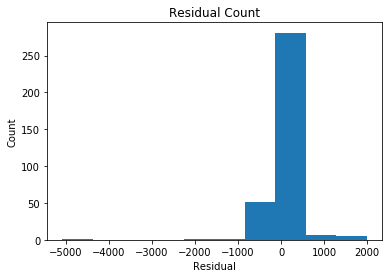

In [57]:
# Extracting the predicted values
predicted = regr.predict(X).ravel()
actual = features['Property crime']

#calculate the error(residual)
residual = actual - predicted


plt.hist(residual)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Count')
plt.show()



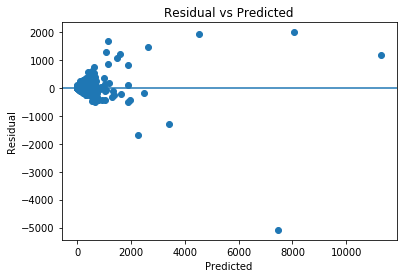

In [58]:
# Homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs Predicted')
plt.show()


In [59]:
#Multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)


,Population,Popsquared,Murder_category,Robbery_category
Population,1.000,0.889,0.374,0.344
Popsquared,0.889,1.000,0.167,0.152
Murder_category,0.374,0.167,1.000,0.302
Robbery_category,0.344,0.152,0.302,1.000


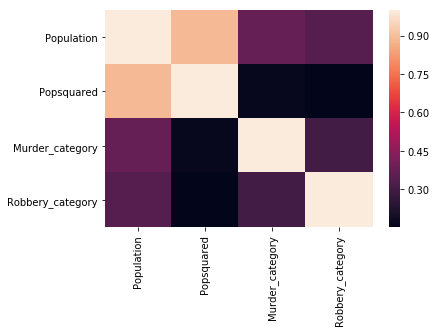

In [60]:
sns.heatmap(X.corr())

In [61]:
# Validating the model

In [62]:
import statsmodels.api as sm

In [63]:
Y = features['Property crime'].values.reshape(-1, 1)
X = features[['Population', 'Popsquared', 'Murder_category', 'Robbery_category']]

In [64]:
#Fitting the model to our data
X = sm.add_constant(X)
model = sm.OLS(Y,X)
model= model.fit()
X = sm.add_constant(X)

In [65]:
print ("R squared: ", model.rsquared)
print ("\nParameters\n\n", model.params)
print ("\nP-values\n\n", model.pvalues)
print ("\nConfidence Intervals")
display(model.conf_int())


R squared:  0.8421049462865594

Parameters

 const              -20.793
Population           0.014
Popsquared           0.000
Murder_category     84.240
Robbery_category   100.085
dtype: float64

P-values

 const              0.568
Population         0.000
Popsquared         0.000
Murder_category    0.273
Robbery_category   0.054
dtype: float64

Confidence Intervals


,0,1
const,-92.278,50.692
Population,0.010,0.018
Popsquared,0.000,0.000
Murder_category,-66.773,235.253
Robbery_category,-1.742,201.912


In [66]:
# Test the model with different holdout groups.(Train = 80% and Test = 20%)
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Classify, storing the result in a training variable and Fit our model to the data.
train_pred = regr.fit(data_train, target_train,).predict(data_train)

# Display our Training results.
print('\nTraining Coefficients: \n', regr.coef_)
print('\nTraining Intercept: \n', regr.intercept_)
print('\nTraining R-squared:')
print(regr.score(X, Y))


# Classify, storing the result in a testing variable and Fit our model to the data.
test_pred = regr.fit(data_test, target_test).predict(data_test)

# Display our Testing results
print('\nTesting Coefficients: \n', regr.coef_)
print('\nTesting Intercept: \n', regr.intercept_)
print('\nTesting R-squared:')
print(regr.score(X, Y))


Training Coefficients: 
 [[ 0.00000000e+00  1.24541977e-02  1.19483289e-07 -9.20361714e+00
   1.18141556e+02]]

Training Intercept: 
 [-8.94836923]

Training R-squared:
0.8403200265599315

Testing Coefficients: 
 [[0.00000000e+00 2.10915314e-03 3.14249345e-07 3.98497990e+02
  1.18760549e+02]]

Testing Intercept: 
 [15.33854643]

Testing R-squared:
0.2911242562446553


We can see after dataset into training and testing groups, the accuracy remains consistent.